<a href="https://colab.research.google.com/github/SandeepH2706/ML_playground/blob/main/Supervised_Classification_using_Machine_Learning(classification_of_true_and_false_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fake-and-real-news-dataset
About Dataset

Dataset separated in two files:

  1.Fake.csv (23502 fake news article)

  2.True.csv (21417 true news article)

Dataset columns:
Title: title of news article

Text: body text of news article

Subject: subject of news article

Date: publish date of news article

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Step 2: Load the datasets
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [ ]:
# Step 3: Add labels to the datasets
fake_df['label'] = 1  # 1 indicates fake news
true_df['label'] = 0  # 0 indicates real news

In [ ]:
# Step 4: Combine the datasets
df = pd.concat([fake_df, true_df], ignore_index=True)

In [ ]:
# Step 5: Shuffle the combined dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Step 6: Select the features and labels
X = df['text']
y = df['label']

In [ ]:
# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 8: Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Step 9: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [ ]:
# Step 10: Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [ ]:
# Step 11: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.982739420935412

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4270
           1       0.99      0.98      0.98      4710

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Confusion Matrix:
 [[4207   63]
 [  92 4618]]


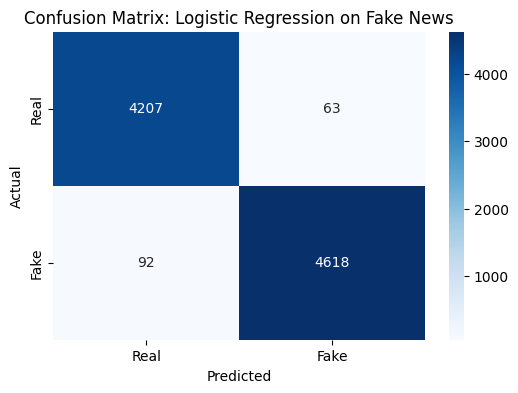

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels
y_pred = model.predict(X_test_tfidf)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Custom display with Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression on Fake News')
plt.show()


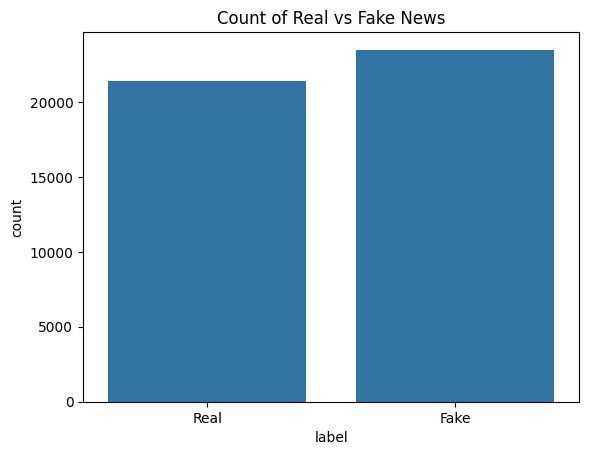

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.title("Count of Real vs Fake News")
plt.show()

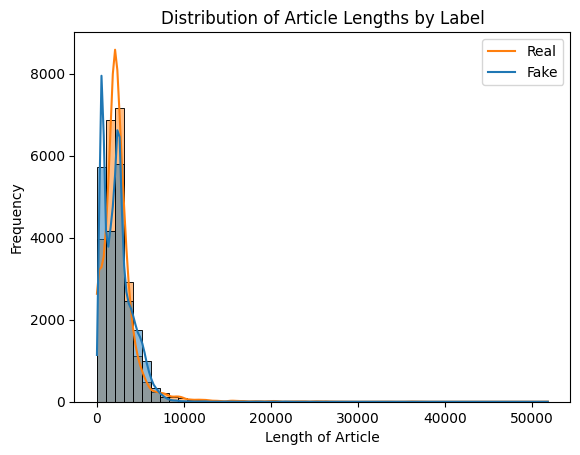

In [ ]:
df['text_length'] = df['text'].apply(len)

sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title("Distribution of Article Lengths by Label")
plt.xlabel("Length of Article")
plt.ylabel("Frequency")
plt.legend(['Real', 'Fake'])
plt.show()

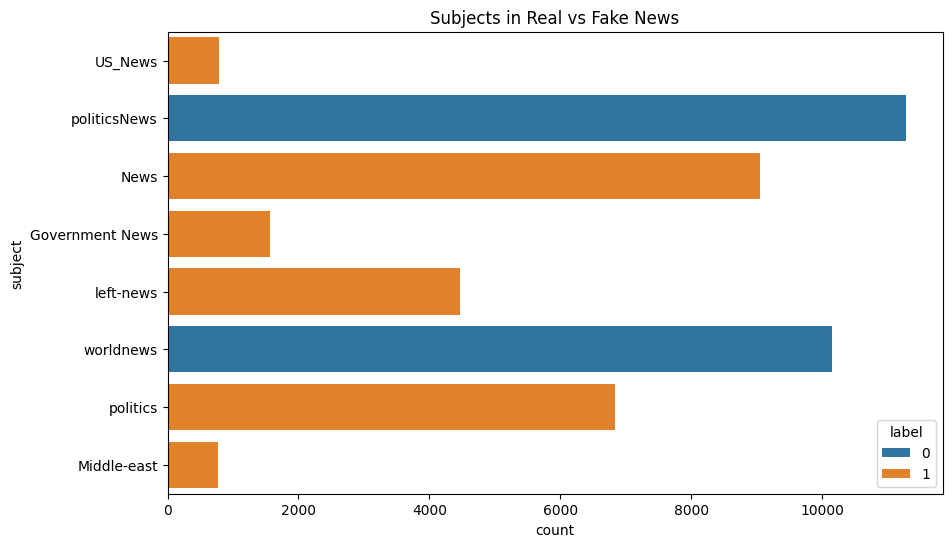

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='subject', hue='label')
plt.title("Subjects in Real vs Fake News")
plt.show()

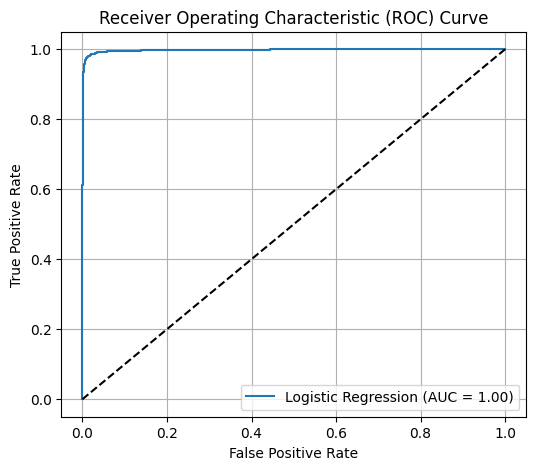

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<ipython-input-19-1f649983034b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams), palette='mako')


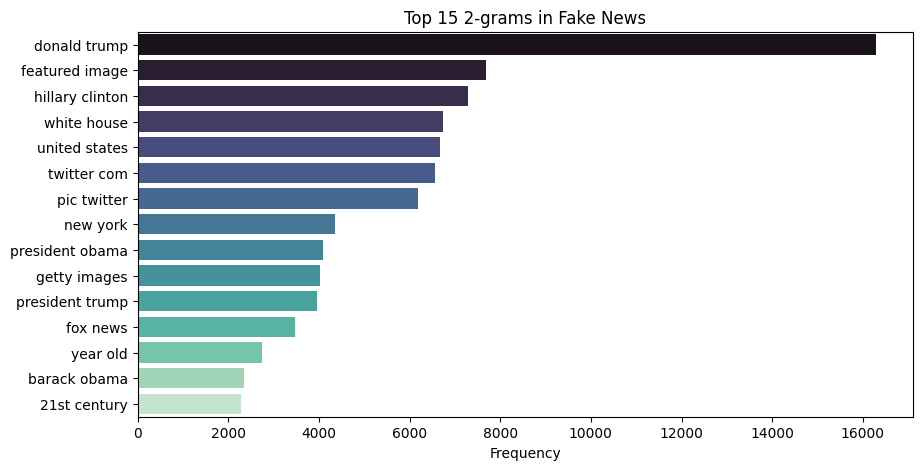

<ipython-input-19-1f649983034b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams), palette='mako')


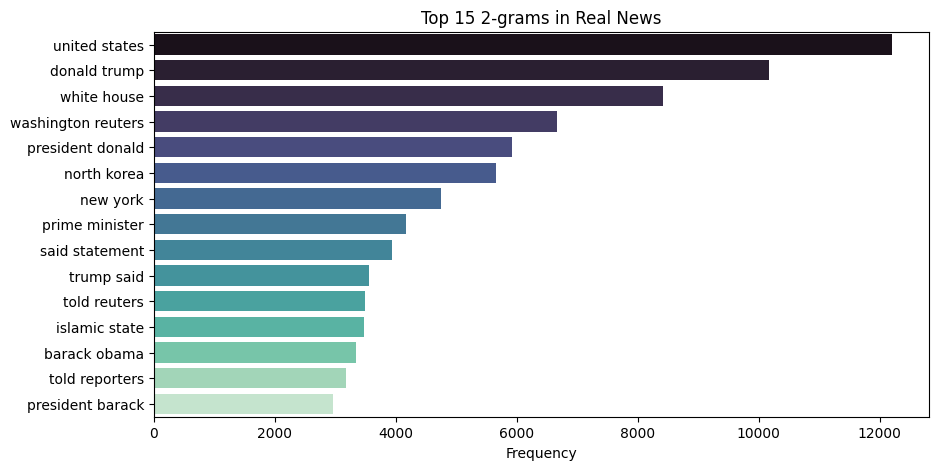

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(corpus, label, n=2, top_k=15):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

    ngrams, counts = zip(*words_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(ngrams), palette='mako')
    plt.title(f"Top {top_k} {n}-grams in {'Fake' if label == 1 else 'Real'} News")
    plt.xlabel("Frequency")
    plt.show()

# Plot for fake news
plot_top_ngrams(fake_df['text'], label=1)

# Plot for real news
plot_top_ngrams(true_df['text'], label=0)
